<a href="https://colab.research.google.com/github/shubham-bhadouria/-Seoul-Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date    #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import warnings; warnings.simplefilter('ignore')

## Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Dataset





In [3]:
bike_data = pd.read_csv('/content/drive/MyDrive/Bike sharing demand prediction - Shubham Bhadouria/Copy of SeoulBikeData.csv', encoding= 'unicode_escape')

## Data Overview

In [4]:
#view data head
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#view data tail
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [318]:
#Checking number of rows and columns in our dataset.
print("Number of rows is: ", bike_data.shape[0])
print("Number of columns is: ", bike_data.shape[1])

Number of rows is:  8760
Number of columns is:  14


In [6]:
# Checking data type each columns
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# Describing data 
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
# columns in the dataset
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
#checking null values in each columns
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

So, there are no null values present in our dataset

In [10]:
# total duration of the data
len(bike_data['Date'].unique())

365

The dataset shows hourly rental data for one year (1 December 2017 to 31 November2018)(365 days)

In [11]:
# Unique values of column Holiday.
bike_data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

People prefers to borrow a bike during non- holidays.

## Feature Creation

Now, let us extract Date and create some useful new features from this Date features

In [12]:
# Extarcting all usefull from date format
bike_data['Date']=pd.to_datetime(bike_data['Date'],format="%d/%m/%Y")
bike_data['Year'] = bike_data['Date'].dt.year
bike_data['Month']= bike_data['Date'].dt.month    # It will contain the month number instead of characters with January=1, February=2,..and December=12
bike_data['weekday']=bike_data['Date'].dt.weekday # It will convert weekday into number start at Monday=0 and end at Sunday=6.

In [13]:
bike_data.head(2)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4


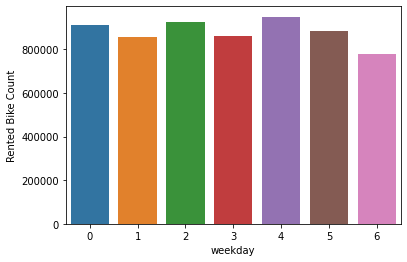

In [14]:
# bike rented on various days of the week
sns.barplot(x ='weekday', y ='Rented Bike Count', data = bike_data.groupby('weekday')['Rented Bike Count'].sum().reset_index().sort_values("weekday", ascending=True), palette ='tab10')

There is no significant difference in bike rented on various days of the weeks, but minimum bike rented on Sunday.

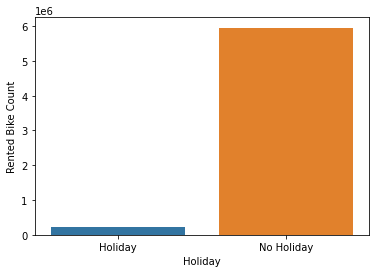

In [15]:
# bike rented on holiday and non-holiday
sns.barplot(x ='Holiday', y ='Rented Bike Count', data = bike_data.groupby('Holiday')['Rented Bike Count'].sum().reset_index(), palette ='tab10')

People prefers to borrow bike during non-holidays

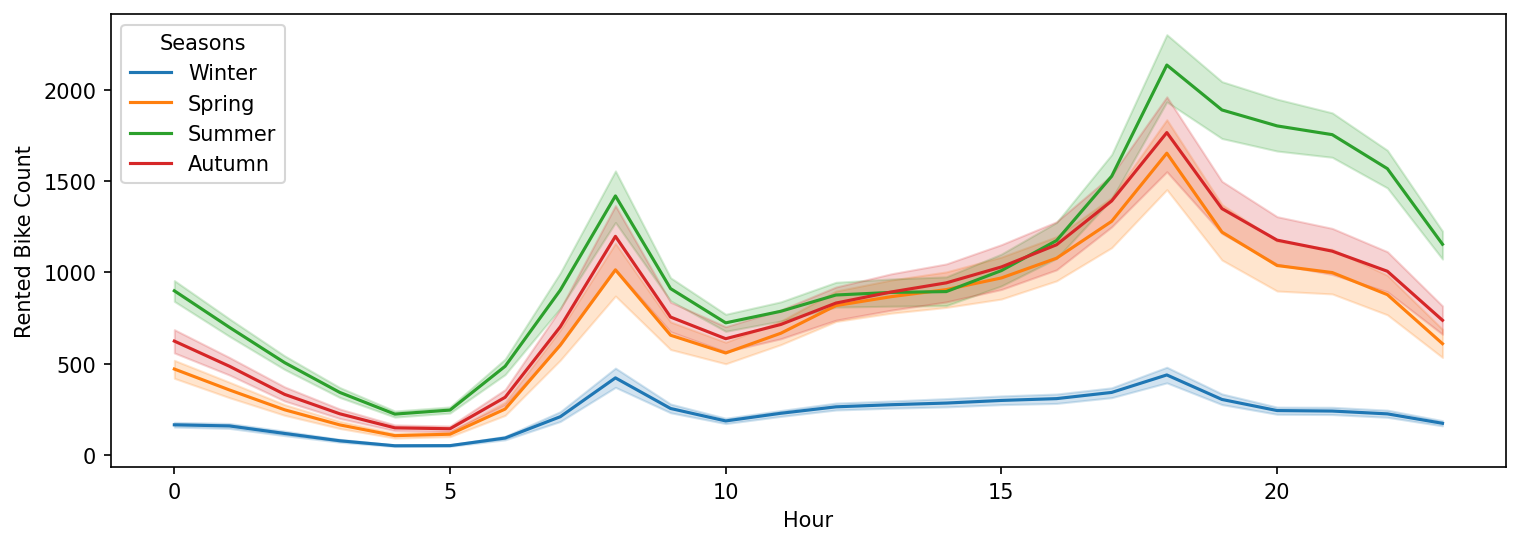

In [16]:
# line plot for bike rented on various seasonal at various hours of a day
plt.figure(figsize=(12,4), dpi=150)
sns.lineplot(data=bike_data, x="Hour", y="Rented Bike Count", hue="Seasons")

People prefer borrowing bikes more in a particular season. Rented bike count is highest in summer and least in winter. Peak demand of bike is at 8am and 6pm i.e. during office opening and closing times.

In [17]:
# total data for each year
bike_data['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

The data available is for year 2017 and 2018.  Year 2017 consist of data of december month only and year 2018 has data of whole year except december.

In [18]:
#bar plot for bike rented on various months of different years
import plotly.express as px
px.bar(bike_data.groupby(['Year','Month'])['Rented Bike Count'].sum().reset_index(),y= 'Rented Bike Count',x='Month' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=800)

From the above graph, it can be concluded that the bike count is less in December, January, February (i.e. in winter) and maximum in June followed by July and May.

# Checking distribution of our dependent variable

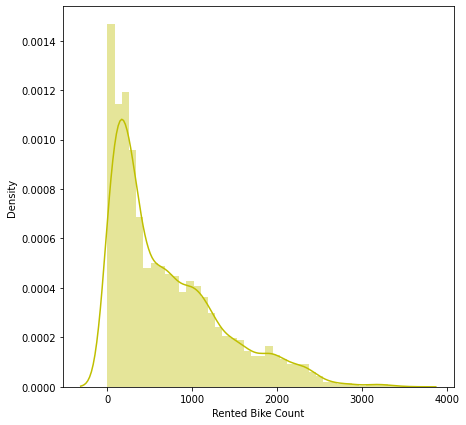

In [19]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(bike_data['Rented Bike Count'],color="y")

Dependent variable 'Rented Bike Count' is positively skewed. so, we have to apply some transformation to covert it into normal distribution. 

Our dependent variable contains value = 0, therefore we can't apply log transformation or inverse transformation here.  

Lets apply square-root transformation.

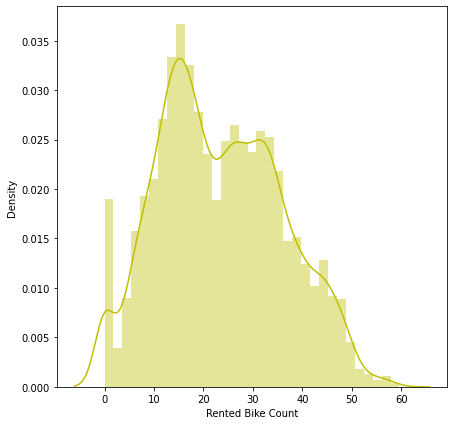

In [21]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(bike_data['Rented Bike Count']),color="y")

The distribution is almost seems to be normal after distribution.

# Exploring Categorical variables

In [22]:
categorical_features = bike_data.describe(include='object').columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

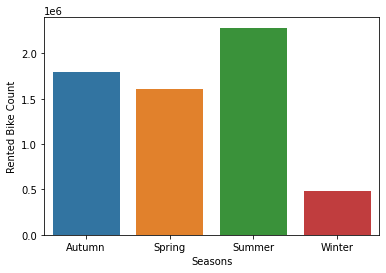

In [23]:
# Total bike rented in various seasons of the year
sns.barplot(x ='Seasons', y ='Rented Bike Count', data = bike_data.groupby('Seasons')['Rented Bike Count'].sum().reset_index(), palette ='tab10')

People borrows least bikes in Winter and maximum bikes in Summer.

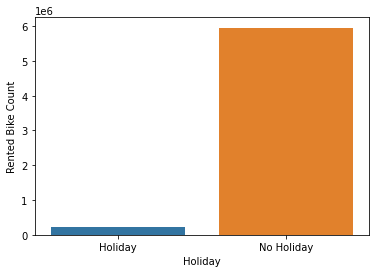

In [24]:
# total bike rented on holidays and non-holidays
sns.barplot(x ='Holiday', y ='Rented Bike Count', data = bike_data.groupby('Holiday')['Rented Bike Count'].sum().reset_index(), palette ='tab10')

People prefer to borrow bikes during non-holidays.

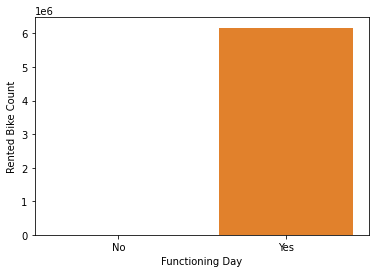

In [25]:
# Total bike rented on function and non-functional days
sns.barplot(x ='Functioning Day', y ='Rented Bike Count', data = bike_data.groupby('Functioning Day')['Rented Bike Count'].sum().reset_index(), palette ='tab10')

Thus, people only borrows bike during functional days of the week.

# Exploring Numerical Features

In [26]:
# Extracting independent numerical features from dataset
numerical_features = [coluumn for coluumn in bike_data.describe().columns if coluumn not in ['Rented Bike Count','Year','Month','weekday']]
numerical_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

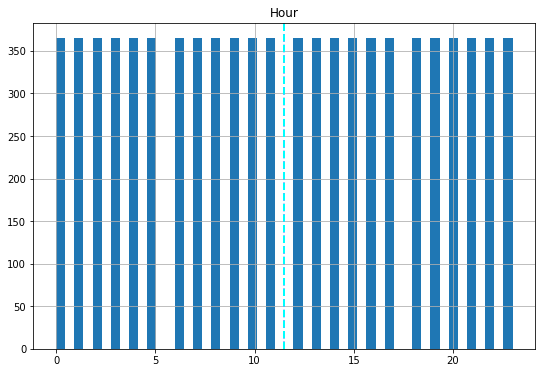

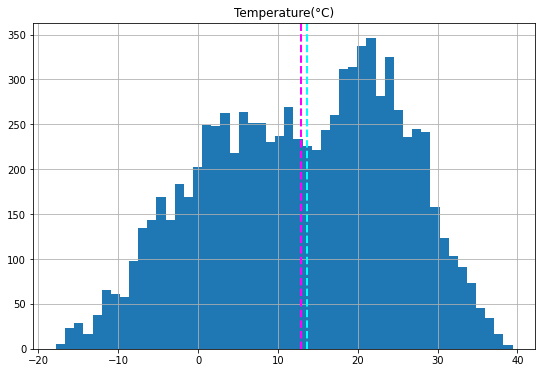

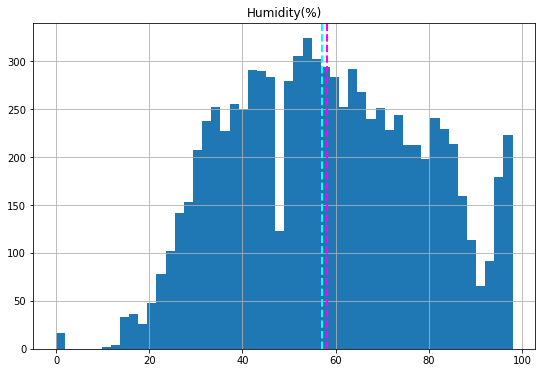

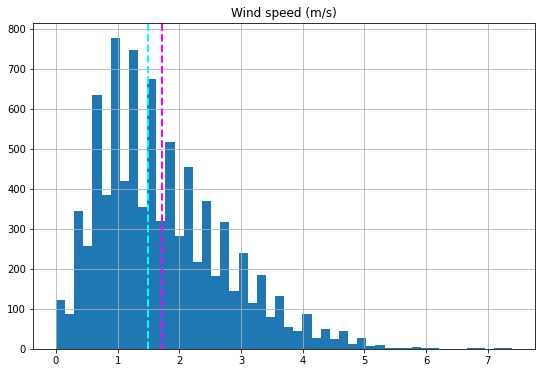

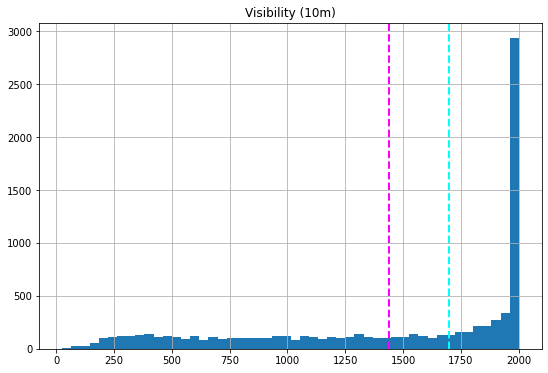

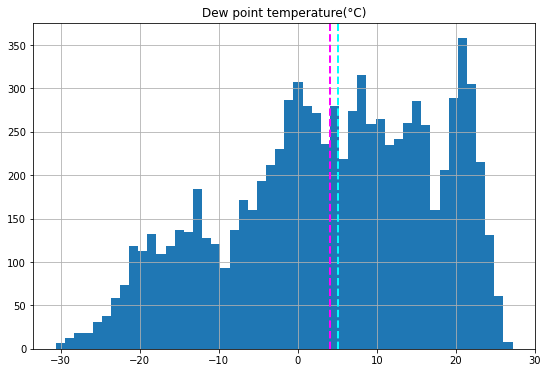

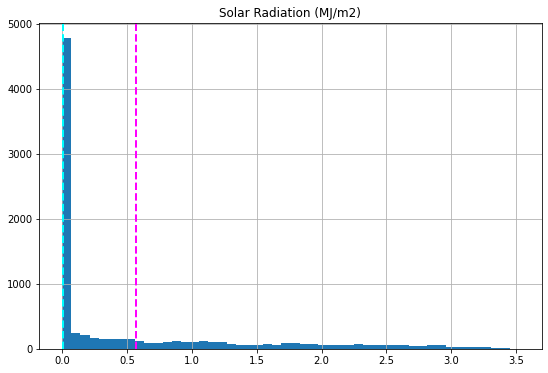

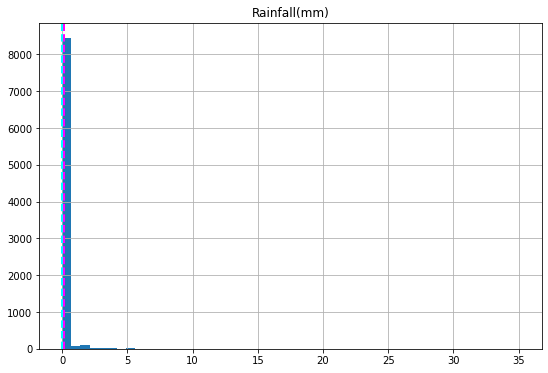

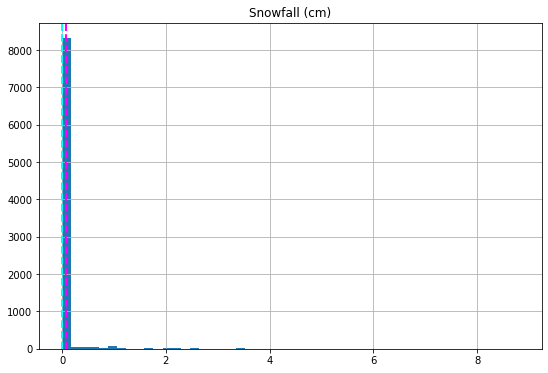

In [27]:
# plot a bar plot for each numerical feature count
for col in numerical_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

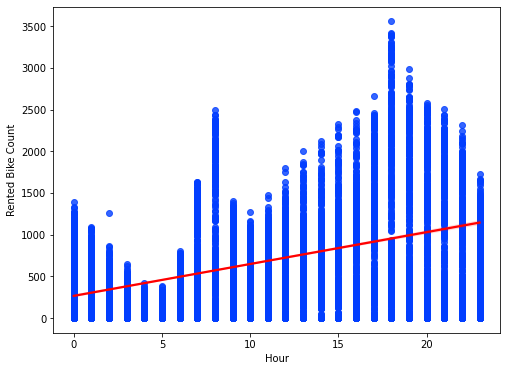

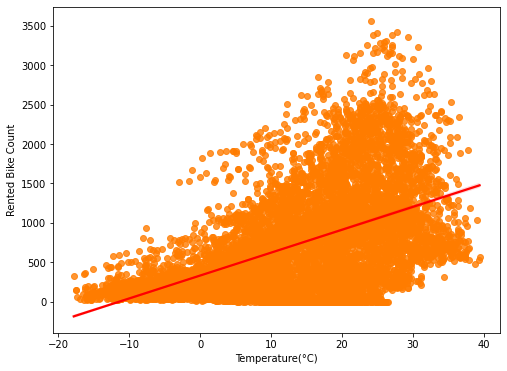

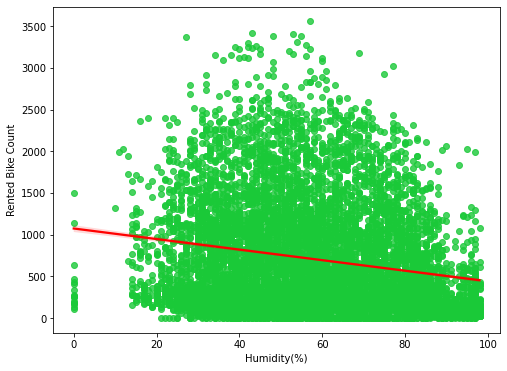

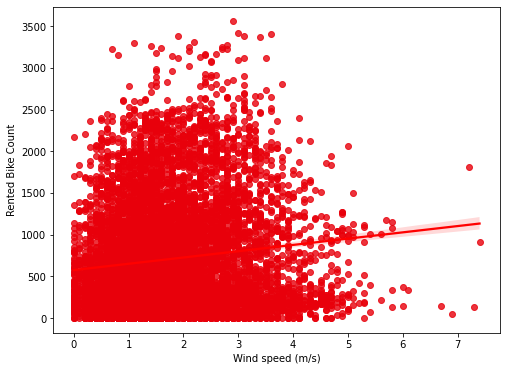

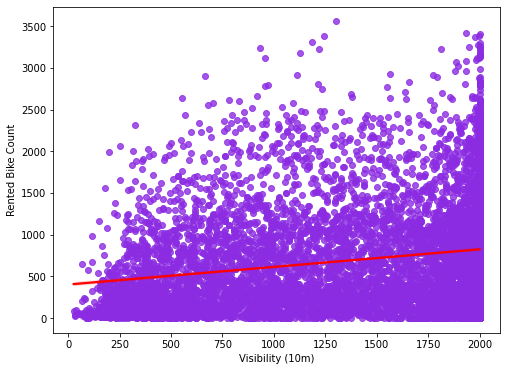

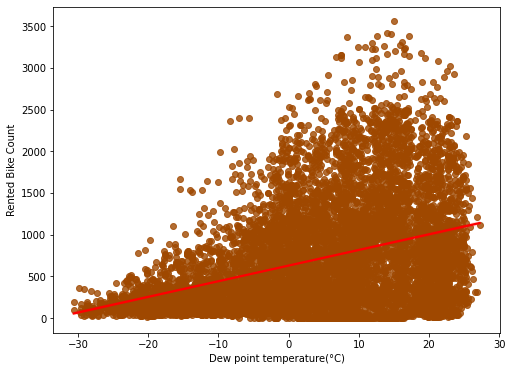

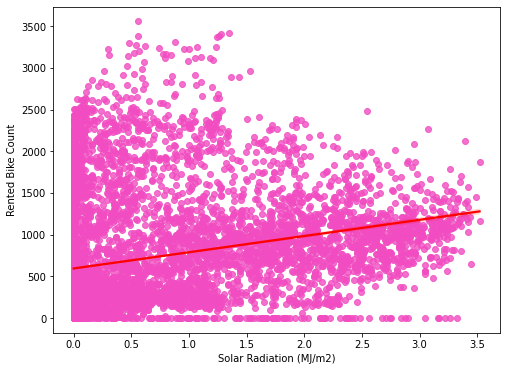

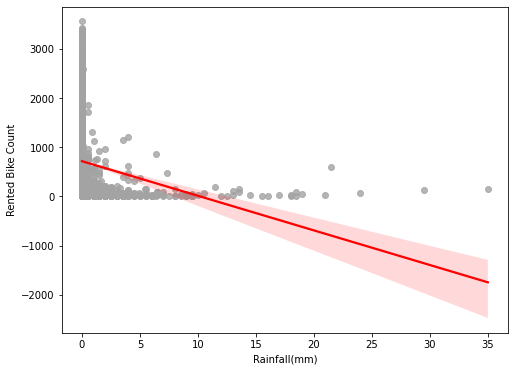

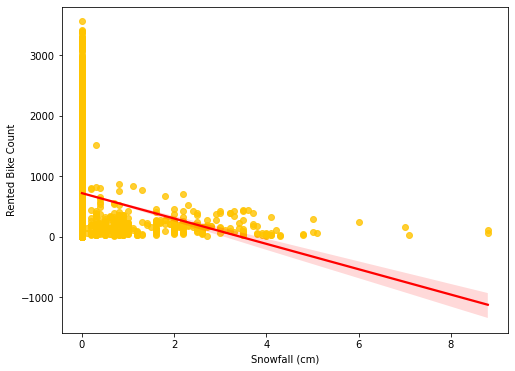

In [28]:
#plot for numerical feature
plt.rcParams['figure.figsize'] = (8, 6)
color_map = dict(zip(numerical_features, sns.color_palette("bright")))
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented Bike Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

since data is not in proper linear regression for snowfall, rainfall, wind speed and humidity.  Let's plot box plot for them.

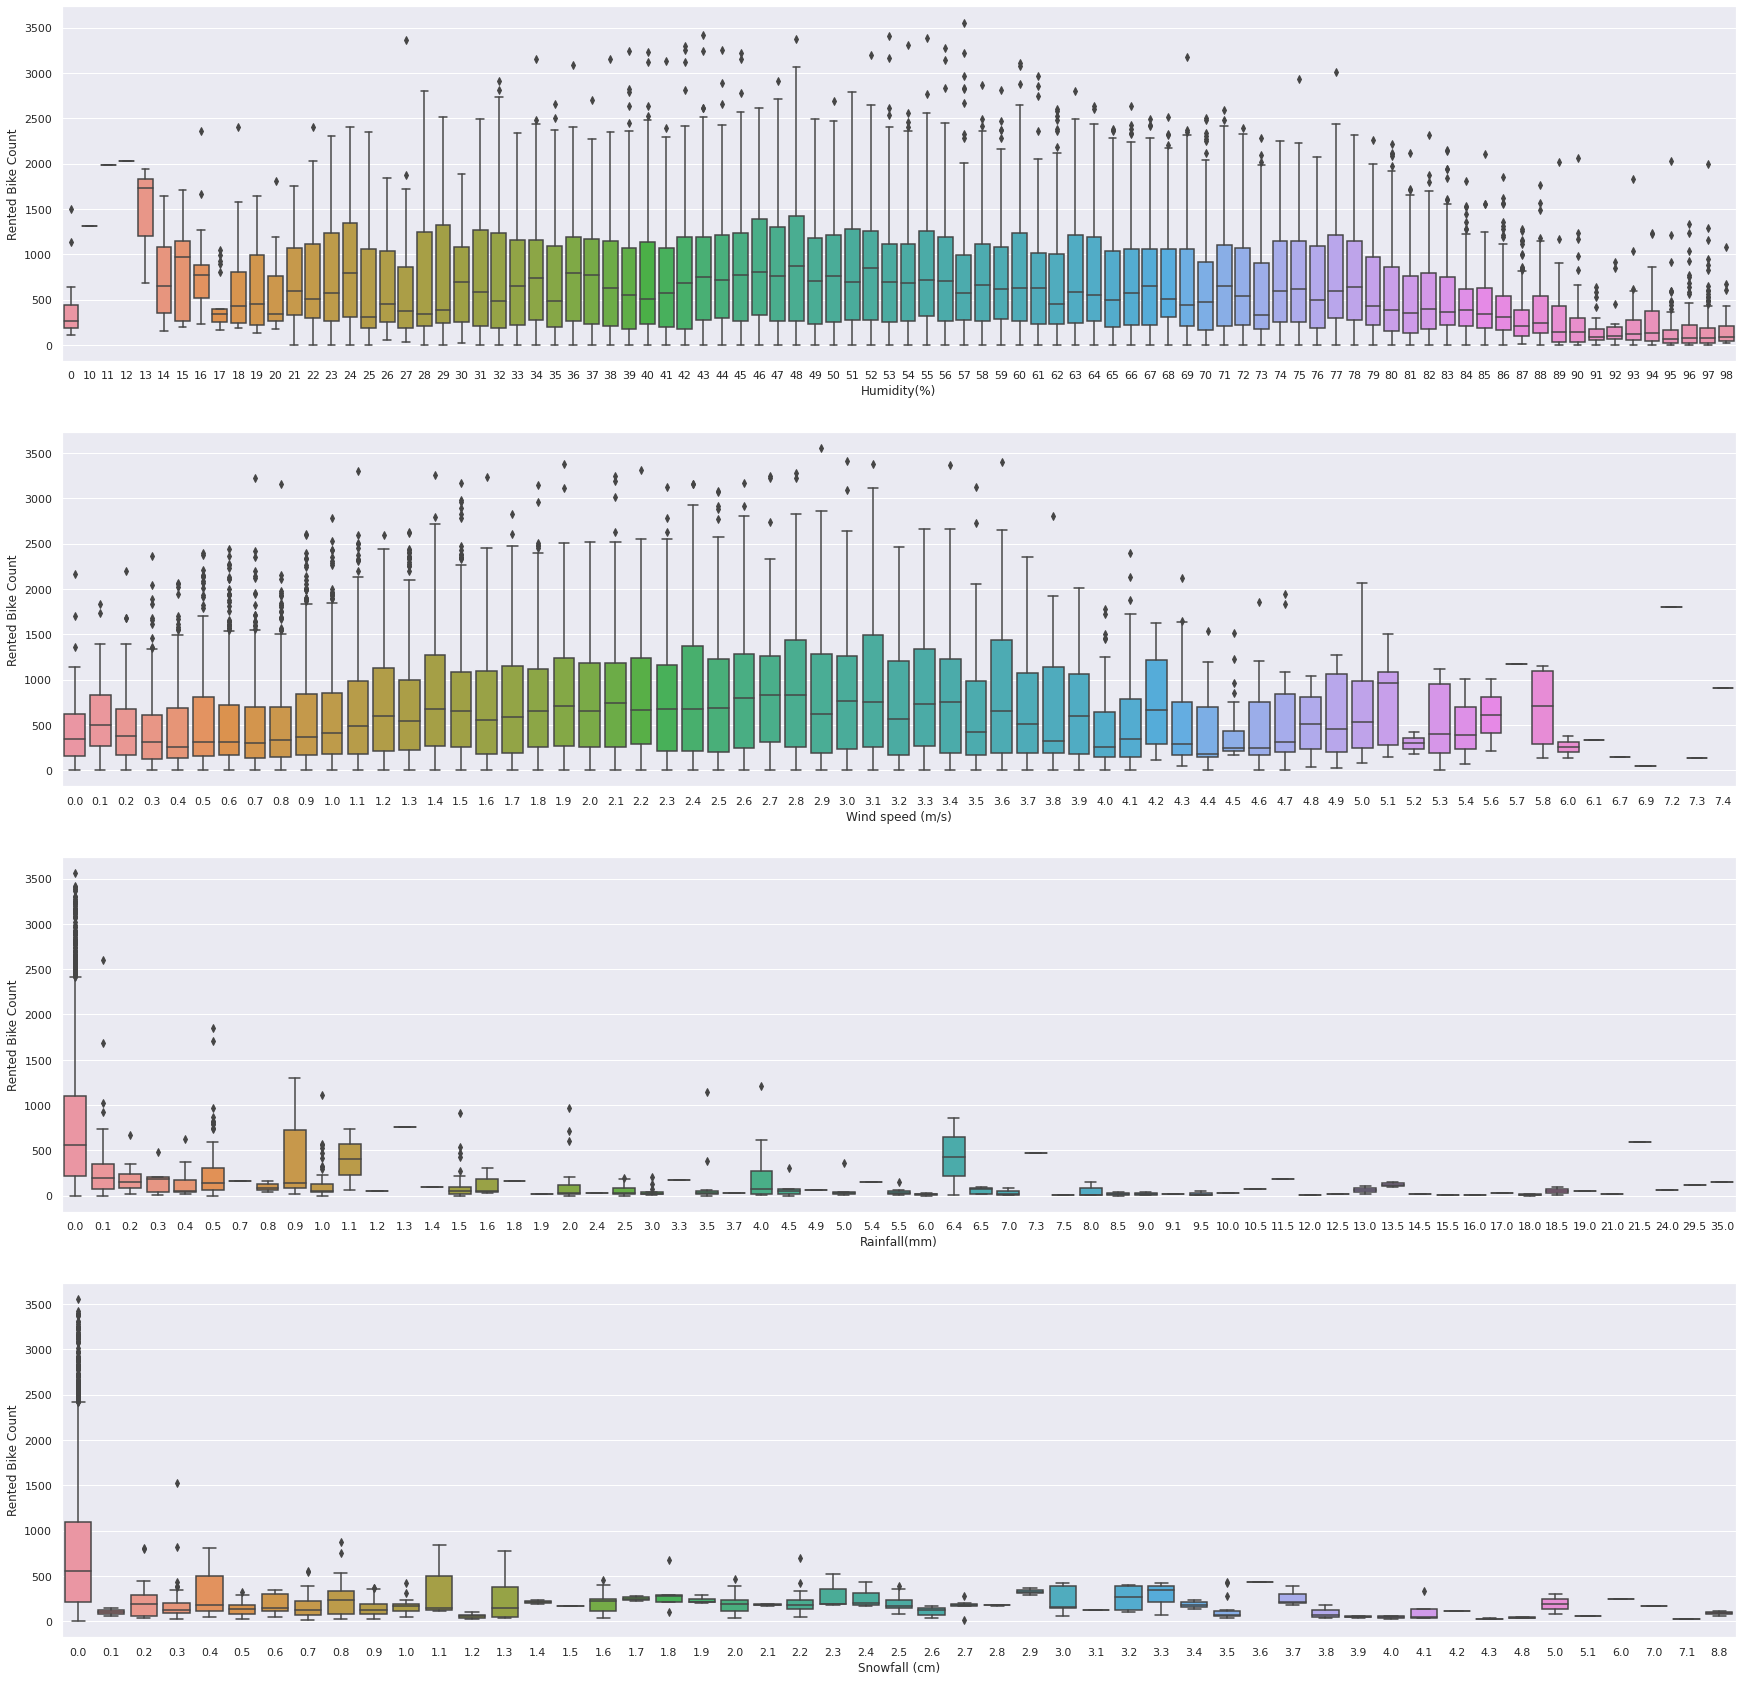

In [29]:
# box plot 
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(30,30)

sns.boxplot(data=bike_data,y="Rented Bike Count",x="Humidity(%)",orient="v",ax=axes[0])
sns.boxplot(data=bike_data,y="Rented Bike Count",x="Wind speed (m/s)",orient="v",ax=axes[1])
sns.boxplot(data=bike_data,y="Rented Bike Count",x="Rainfall(mm)",orient="v",ax=axes[2])
sns.boxplot(data=bike_data,y="Rented Bike Count",x="Snowfall (cm)",orient="v",ax=axes[3])

# Effects of Numerical features in rented bike count:-


*   Hour: Demand for bike is mostly in morning (7am to 9am) and in the evening (5pm to 8pm). People generally borrows bike during office hour.
*   Temperature : Temperature is positively correlated. Rented bike count is highest between 20 °C and 30 °C.
*   Humidity : Humidity is the amount of water vapor content present in the air. Humidity is negatively correlated. So, People preferring to borrow bike When there is less humidity.
*   Wind_speed : wind speed doesn't affect our data much but people prefer borrowing bike when speed is less than 4m/s.
*   SnowFall: People don't prefer borrowing bike, where there is snowfall.
*   RainFall: People don't prefer borrowing bike, where there is rainfall.
*   Dew point:It is the point at which air cannot hold more water vapour(i.e. air became saturated). It is positively correlated with data.

# Let's try to remove outlier(Unwanted or Extra which makes our dataset quite unwell) from our dataset.

Let's keep the data only for humidity > 20, wind speed < 4, rainfall <0.5 and snowfall<0.25 and drop unnecessary columns like Date ,Year and weekday.

In [30]:
bike_data = bike_data[(bike_data["Wind speed (m/s)"]<=4) & (bike_data["Humidity(%)"]>=20) & (bike_data["Rainfall(mm)"]<=0.5) & (bike_data["Snowfall (cm)"]<=0.25)]
bike_data.drop(['Date','Year','weekday'], axis=1, inplace=True)

Let's Draw one more time regression scatter plot between dependent and all the indendent variable...

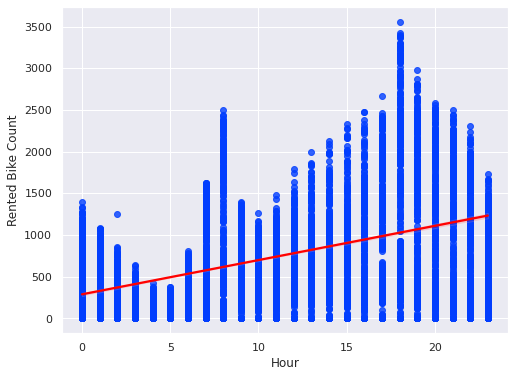

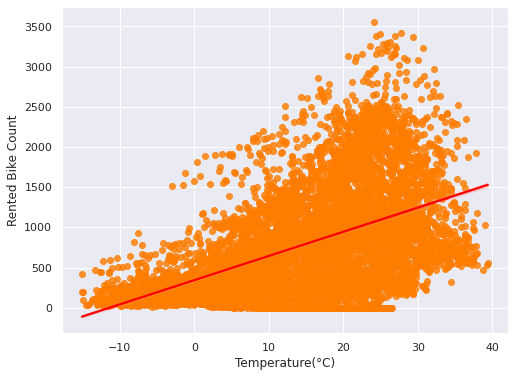

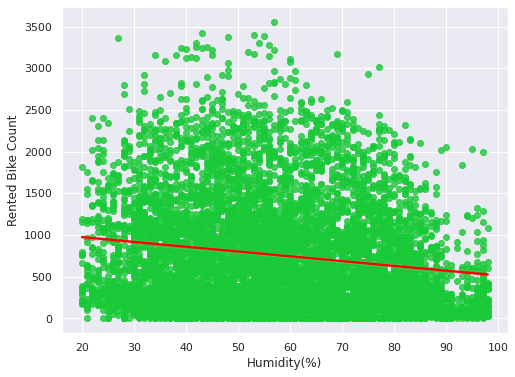

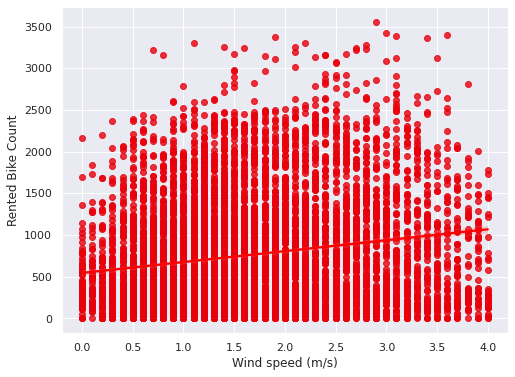

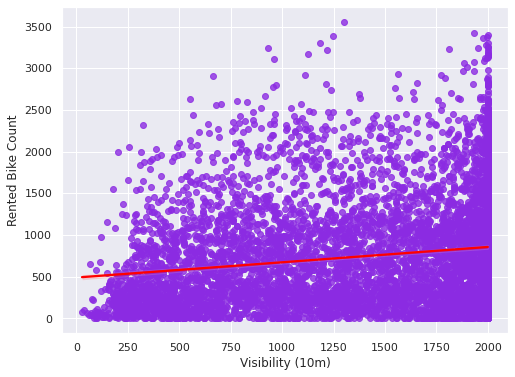

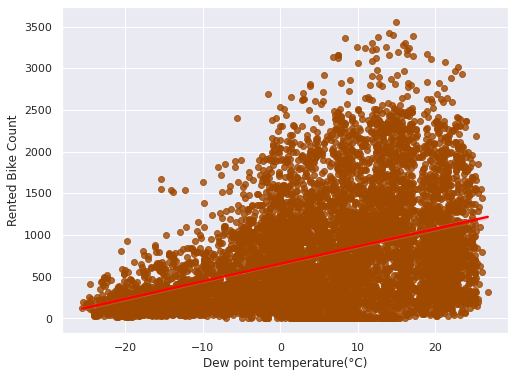

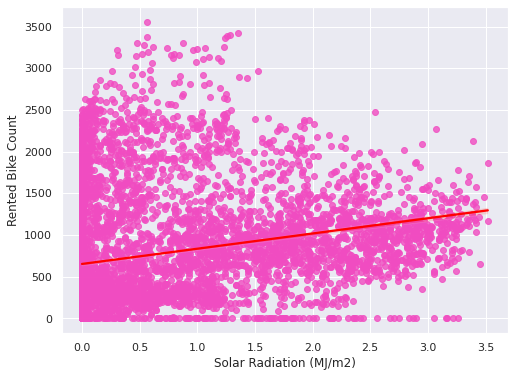

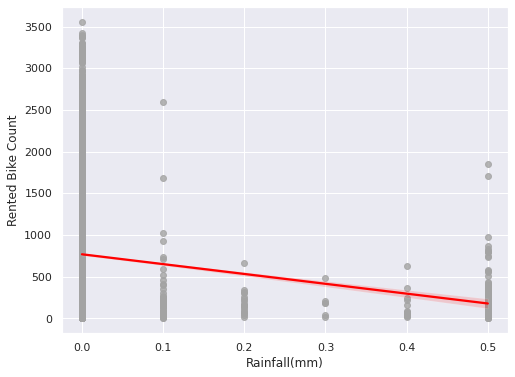

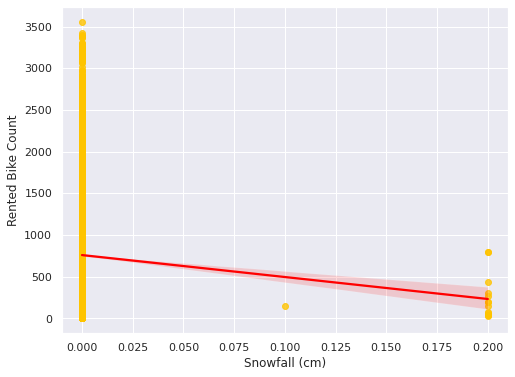

In [214]:
plt.rcParams['figure.figsize'] = (8, 6)
color_map = dict(zip(numerical_features, sns.color_palette("bright")))
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented Bike Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

After removing outlier we are getting our regression scatter plot in a quiet well manner and now we can find out the relation between them.

# Correlation

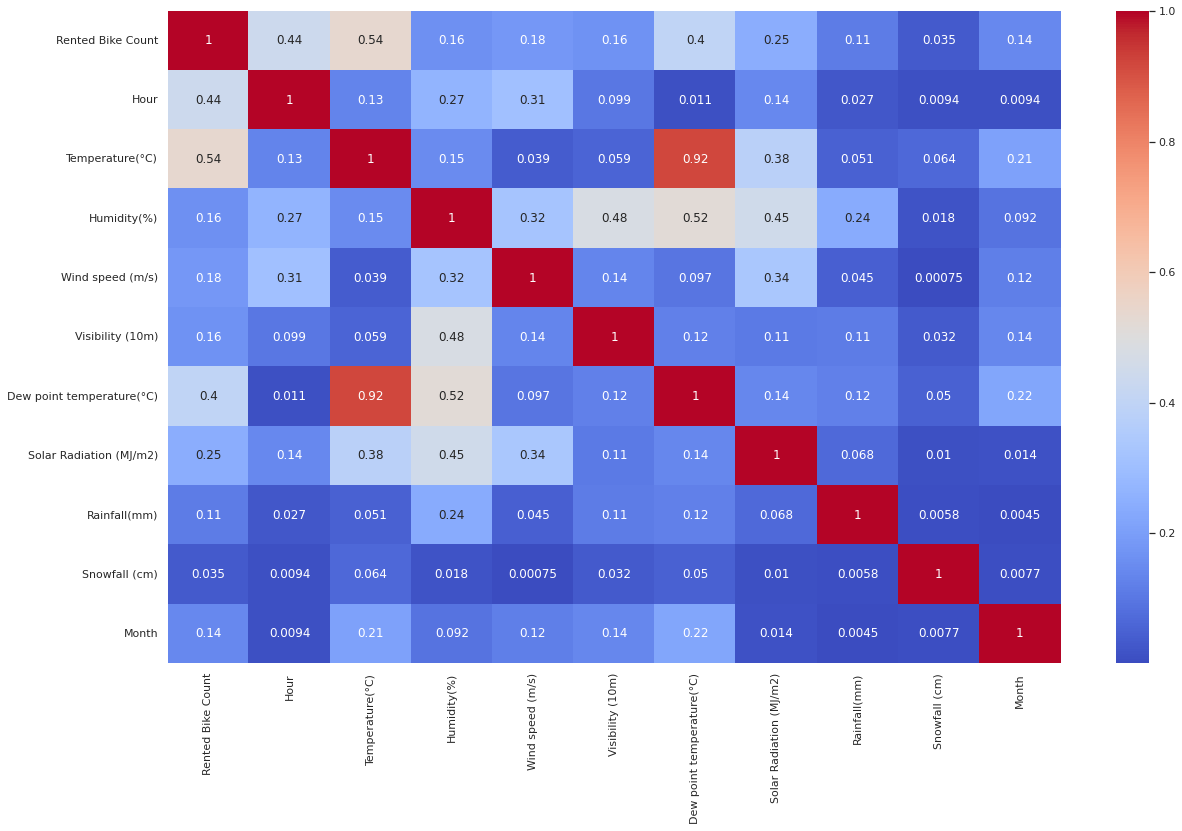

In [31]:
# Lets see correlation graph
plt.figure(figsize=(20,12))
correlation = bike_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Here, temperture, dew point temperture and humidity are highly correlated with each other. Let us find out VIF to remove multicollinearity.

In [32]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.386681
1,Temperature(°C),38.327994
2,Humidity(%),6.905181
3,Wind speed (m/s),5.418175
4,Visibility (10m),9.753419
5,Dew point temperature(°C),17.790266
6,Solar Radiation (MJ/m2),2.858915
7,Rainfall(mm),1.075708
8,Snowfall (cm),1.008484
9,Month,5.389159


Here, VIF of Temperature and Dew point temperature are greater than 10. Let check if after removing Dew point Temperature VIF of all independent variable should be under 10.

In [34]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.931253
1,Temperature(°C),3.470934
2,Humidity(%),6.284281
3,Wind speed (m/s),5.119235
4,Visibility (10m),5.809378
5,Solar Radiation (MJ/m2),2.244557
6,Rainfall(mm),1.070191
7,Snowfall (cm),1.008483
8,Month,5.289116


After removing Dew point Temperature VIF of all the independent variables will be under 10. 

In [35]:
# Dropping column Dew point temperature from our dataset
bike_data.drop('Dew point temperature(°C)', axis=1, inplace=True)

# Data encoding

In [40]:
#label encoding
encoders_nums = {"Seasons":{"Autumn":0,"Spring":1,"Summer":2,"Winter":3},
                 "Holiday":{"Holiday":1,"No Holiday":0},   
                 "Functioning Day":{"Yes": 1, "No": 0},
                }
bike_data = bike_data.replace(encoders_nums)
bike_data.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,0,1,12
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,0,1,12


In [41]:
# shape of the data
bike_data.shape

(7693, 13)

# Prepairing Dataset for Modelling

In [42]:
# Create the data of independent variables
X = bike_data.drop(labels='Rented Bike Count',axis=1)

# Data for the dependent variable
y = np.sqrt(bike_data['Rented Bike Count'])

In [43]:
print(X.shape)
print(y.shape)

(7693, 12)
(7693,)


In [44]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data in train and test set

In [46]:
#import train-test split lib
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Splited the selected data set in 70-30 split for training and testing purpose respectively

In [47]:
print('Train Data Shape')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('Test Data Shape')
print(X_test.shape)
print(y_test.shape)

Train Data Shape
(5385, 12)
(5385,)


Test Data Shape
(2308, 12)
(2308,)


# Linear Regression

In [48]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linear_reg =  LinearRegression()

#Apply model on train dataset
linear_reg.fit(X_train, y_train)

LinearRegression()

In [49]:
#model score on train dataset
linear_reg.score(X_train, y_train)

0.6689207151727001

In [50]:
#predicted value of train and test dataset
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [109]:
#Train Data Evaluation Metrics 
lr_train_mse  = mean_squared_error((y_train)**2, (y_pred_train)**2)
print("Train MSE :" , lr_train_mse)

lr_train_r2 = r2_score((y_train)**2, (y_pred_train)**2)
print("Train R2 :" ,lr_train_r2) 

lr_train_adjusted_r2= 1-(1-r2_score((y_train)**2, (y_pred_train)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_adjusted_r2)

Train MSE : 176191.02957372664
Train R2 : 0.5833054595222409
Train Adjusted R2 :  0.5823746452099301


In [52]:
#Test Data Evaluation Metrics 
lr_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , lr_test_mse)

lr_test_r2 = r2_score((y_test)**2, (y_pred_test)**2)
print("Test R2 :" ,lr_test_r2)

lr_test_adjusted_r2 = 1-(1-r2_score((y_test)**2, (y_pred_test)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_adjusted_r2)

Test MSE : 52.40539224141344
Test R2 : 0.5763625324127122
Test Adjusted R2 :  0.5741474345429747


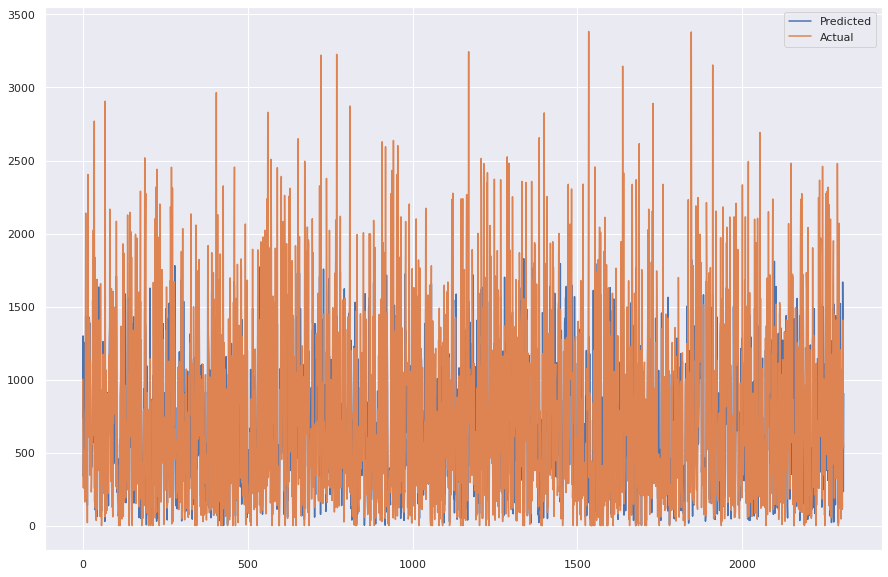

In [53]:
# Actual vs prediction
plt.figure(figsize=(15,10))
plt.plot((y_pred_test)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

If We see above graph our prediction using linear regression model is not quite good.

# Residuals:
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line,

Text(0.5, 0.98, 'Residual Analysis')

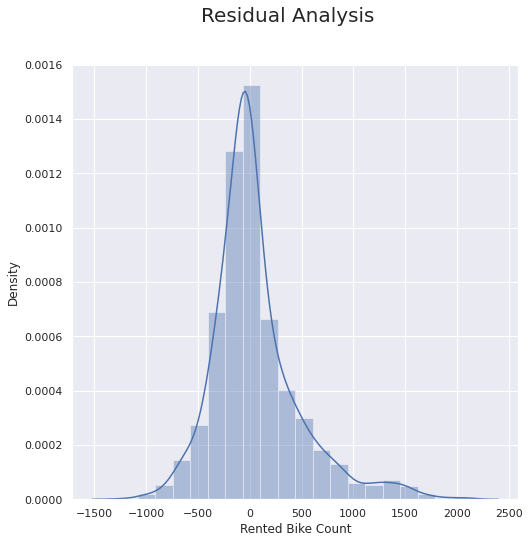

In [54]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)**2- (y_pred_test)**2),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

#  Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.

In [55]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)

In [56]:
#Apply model on train dataset
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [57]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}
The R2 score using the same alpha is : 0.6663317378260178


# The best parameters for the LASSO Regression which we already tested before to save time when running it again.

The best fit alpha value is found out to be : {'alpha': 0.01}

In [58]:
#model score on train dataset
lasso_regressor.score(X_train, y_train)

0.6689044645868776

In [59]:
#predicted value of train and test dataset
y_pred_lasso_train = lasso_regressor.predict(X_train)
y_pred_lasso_test = lasso_regressor.predict(X_test)

# Lasso Regression Model Evaluation

In [60]:
#Train Data Evaluation Metrics 
lasso_train_mse  = mean_squared_error(y_train**2, y_pred_lasso_train**2)
print("Train MSE :" , lasso_train_mse)

lasso_train_r2 = r2_score(y_train**2, y_pred_lasso_train**2)
print("Train R2 :" ,lasso_train_r2)

lasso_train_adjusted_r2= 1-(1-r2_score(y_train**2, y_pred_lasso_train**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", lasso_train_adjusted_r2)

Train MSE : 176488.5941815828
Train R2 : 0.5826017145709057
Train Adjusted R2 :  0.5816693282296642


In [61]:
#Test Data Evaluation Metrics 
lasso_test_mse  = mean_squared_error(y_test**2, y_pred_lasso_test*2)
print("Test MSE :" , lasso_test_mse)

lasso_test_r2 = r2_score(y_test**2, y_pred_lasso_test**2)
print("Test R2 :" ,lasso_test_r2)

lasso_test_adjusted_r2= 1-(1-r2_score(y_test**2, y_pred_lasso_test**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_test_adjusted_r2)

Test MSE : 928867.9691859926
Test R2 : 0.5757889541238373
Test Adjusted R2 :  0.5735708571519358


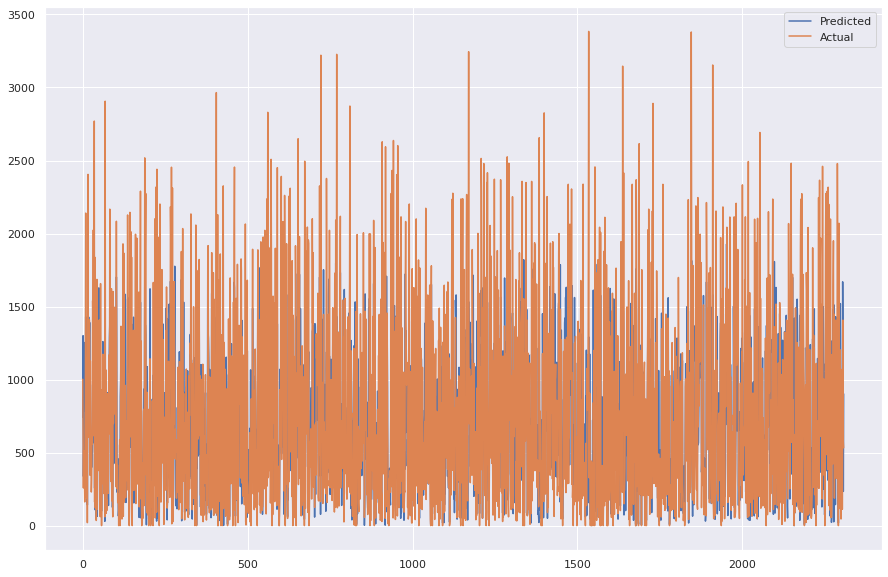

In [62]:
# Actual vs Predicted
plt.figure(figsize=(15,10))
plt.plot((y_pred_lasso_test)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

The Lasso regresion model doesn't improve on the Linear model either.

Text(0.5, 0.98, 'Residual Analysis')

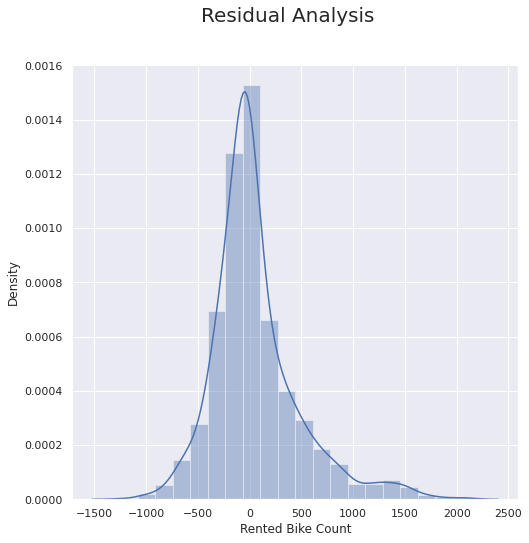

In [63]:
# Residuals Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)**2 - (y_pred_lasso_test)**2),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)


# Implementing Ridge Regression

In [64]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)


In [65]:
#Apply model on train dataset
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [66]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}
The R2 score using the same alpha is : 0.6663107179366728


The best parameters for the RIDGE Regression which we already tested before to save time when running it again.

The best fit alpha value is found out to be : {'alpha': 10}

In [67]:
# predicted value of train and test dataset
y_pred_ridge_train=ridge_regressor.predict(X_train)
y_pred_ridge_test = ridge_regressor.predict(X_test)

# Ridge Regression Model Evaluation

In [68]:
#Train Data Evaluation Metrics 
ridge_train_mse  = mean_squared_error(y_train**2, y_pred_ridge_train**2)
print("Train MSE :" , ridge_train_mse)

ridge_train_r2 = r2_score(y_train**2, y_pred_ridge_train**2)
print("Train R2 :" ,ridge_train_r2)

ridge_train_adjusted_r2= 1-(1-r2_score(y_train**2, y_pred_ridge_train**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_train_adjusted_r2)

Train MSE : 176363.45176868603
Train R2 : 0.5828976783345687
Train Adjusted R2 :  0.581965953118637


In [69]:
#Test Data Evaluation Metrics 
ridge_test_mse  = mean_squared_error(y_test**2, y_pred_ridge_test**2)
print("Test MSE :" , ridge_test_mse)

ridge_test_r2 = r2_score(y_test**2, y_pred_ridge_test**2)
print("Test R2 :" ,ridge_test_r2)

ridge_test_adjusted_r2= 1-(1-r2_score(y_test**2, y_pred_ridge_test**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_adjusted_r2)

Test MSE : 184484.89482933382
Test R2 : 0.576023102475957
Test Adjusted R2 :  0.5738062298091646


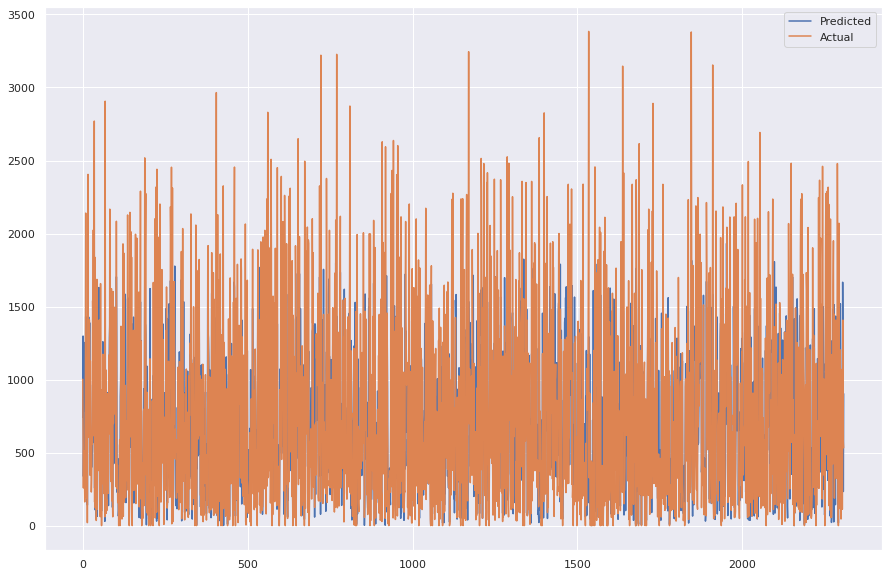

In [70]:
# Actual vs Predicted
plt.figure(figsize=(15,10))
plt.plot((y_pred_ridge_test)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

The Ridge regresion model doesn't improve on the Linear model either.

Text(0.5, 0.98, 'Residual Analysis')

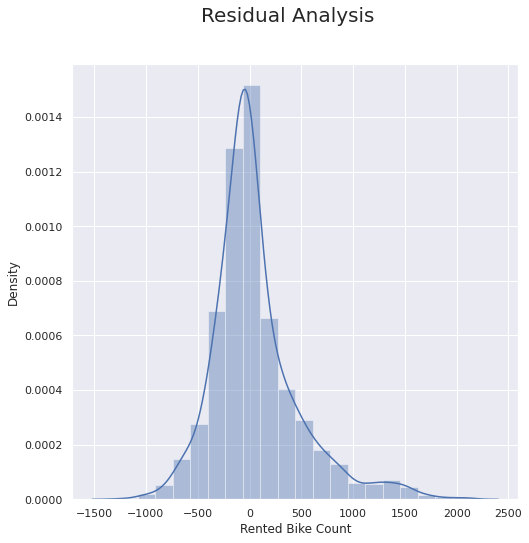

In [71]:
# Residuals Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)**2 - (y_pred_ridge_test)**2),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)


# Running Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor

# Maximum depth of trees
max_depth = [18,20,22,24,26]

# Minimum number of samples required to split a node
min_samples_split = [35,40,45,50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4,5]

# Hyperparameter Grid
param_dict_dt = {'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [73]:
dt = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt, param_grid = param_dict_dt, cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=35; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=35; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=35; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=35; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=35; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=40; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=40; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=40; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=40; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=40; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=45; total time=   0.0s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [18, 20, 22, 24, 26],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [35, 40, 45, 50]},
             scoring='r2', verbose=2)

In [74]:
print('The best parameters for the Decision Tree Regression are  :' ,dt_grid.best_params_)
print('The R2 score using the same alpha is :', dt_grid.best_score_)

The best parameters for the Decision Tree Regression are  : {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 50}
The R2 score using the same alpha is : 0.8506062065242537


**The best parameters for the Decision Tree Regression which we already tested before to save time when running it again.**
* {'max_depth': 24, 'min_samples_leaf': 3, 'min_samples_split': 45}

In [75]:
# predicted value of train and test dataset
y_pred_dt_train=dt_grid.predict(X_train)
y_pred_dt_test=dt_grid.predict(X_test)

# Decision Tree Regressor Model Evaluation

In [76]:
# Train Data Evaluation Metrics 
dt_train_mse  = mean_squared_error(y_train**2, y_pred_dt_train**2)
print("Train MSE :" , dt_train_mse)

dt_train_r2 = r2_score(y_train**2, y_pred_dt_train**2)
print("Train R2 :" ,dt_train_r2)

dt_train_adjusted_r2= 1-(1-r2_score(y_train**2, y_pred_dt_train**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", dt_train_adjusted_r2)

Train MSE : 52168.40378146567
Train R2 : 0.8766209091701817
Train Adjusted R2 :  0.8763453043507554


In [77]:
# Test Data Evaluation Metrics 
dt_test_mse  = mean_squared_error(y_test**2, y_pred_dt_test**2)
print("Test MSE :" , dt_test_mse)

dt_test_r2 = r2_score(y_test**2, y_pred_dt_test**2)
print("Test R2 :" ,dt_test_r2)

dt_test_adjusted_r2= 1-(1-r2_score(y_test**2, y_pred_dt_test**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", dt_test_adjusted_r2)

Test MSE : 76743.02248045518
Test R2 : 0.823631801357063
Test Adjusted R2 :  0.8227096146974922


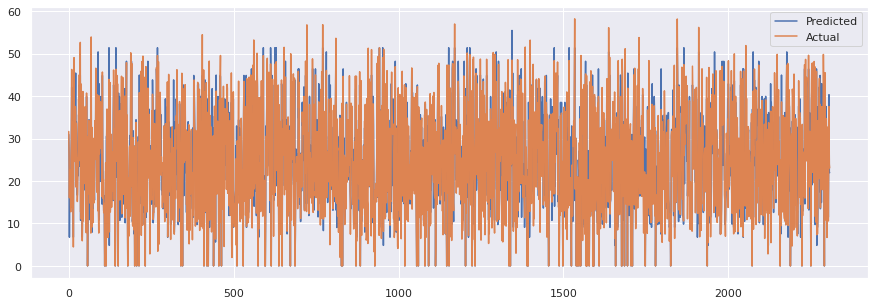

In [78]:
#prediction vs actual for decision tree
plt.figure(figsize=(15,5))
plt.plot((np.array(y_pred_dt_test)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

The decision tree with the selected hyperparameters does improve the predictions of the model very effectively. 

Text(0.5, 0.98, 'Residual Analysis')

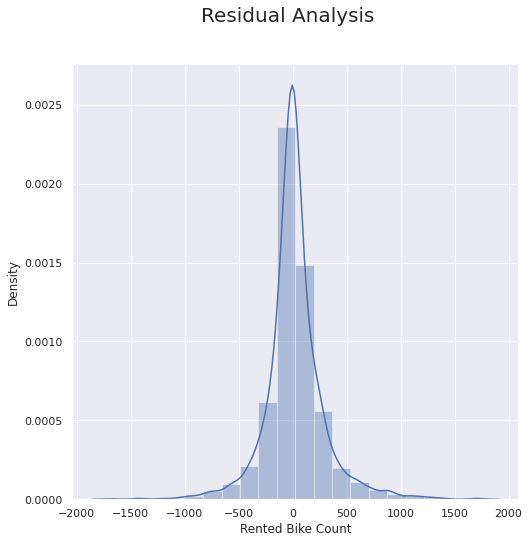

In [79]:
# Residuals Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)**2 - (y_pred_dt_test)**2),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [250,300,350]
# Maximum number of levels in tree
max_depth = [16,18,20]
# Minimum number of samples required to split a node
min_samples_split = [4,6,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 4,6]
# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}



In [82]:
rf = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf, param_grid = random_grid, cv = 5, verbose=2, scoring='r2')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=250; total time=   3.5s
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=250; total time=   3.5s
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=250; total time=   3.5s
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=250; total time=   3.5s
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=250; total time=   3.5s
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=300; total time=   4.2s
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=300; total time=   4.2s
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=300; total time=   4.3s
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=300; total time=   4.2s
[CV] END max_depth=16, min_sa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [16, 18, 20], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [250, 300, 350]},
             scoring='r2', verbose=2)

In [83]:
print('The best parameters for the Random forest regressor are' , rf_grid.best_params_)
print('The R2 score using the same alpha is :', rf_grid.best_score_)

The best parameters for the Random forest regressor are {'max_depth': 18, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 250}
The R2 score using the same alpha is : 0.8871682408961454


The best parameters for the Random Forest Regression which we already tested before to save time when running it again.

{'max_depth': 18, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 250}

In [84]:
# predicted value of train and test dataset
y_pred_rf_train=rf_grid.predict(X_train)
y_pred_rf_test=rf_grid.predict(X_test)

# Random Forest Model Evaluation

In [88]:
# Train Data Evaluation Metrics 
rf_train_mse  = mean_squared_error(y_train**2, y_pred_rf_train**2)
print("Train MSE :" , rf_train_mse)

rf_train_r2 = r2_score(y_train**2, y_pred_rf_train**2)
print("Train R2 :" ,rf_train_r2)

rf_train_adjusted_r2= 1-(1-r2_score(y_train**2, y_pred_rf_train**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", rf_train_adjusted_r2)

Train MSE : 24142.55729831083
Train R2 : 0.9429024744124785
Train Adjusted R2 :  0.9427749296792227


In [85]:
# Test Data Evaluation Metrics 
rf_test_mse  = mean_squared_error(y_test**2, y_pred_rf_test**2)
print("Test MSE :" , rf_test_mse)

rf_test_r2 = r2_score(y_test**2, y_pred_rf_test**2)
print("Test R2 :" ,rf_test_r2)

rf_test_adjusted_r2= 1-(1-r2_score((y_test**2), (y_pred_rf_test**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", rf_test_adjusted_r2)

Test MSE : 58033.498941468875
Test R2 : 0.8666293906803012
Test Adjusted R2 :  0.8659320280171916


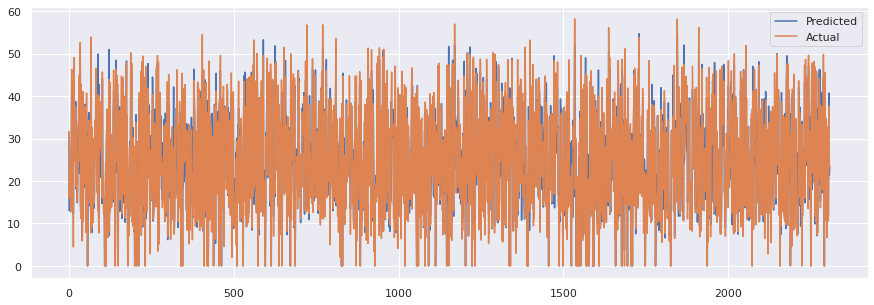

In [86]:
# prediction vs actual for random forest
plt.figure(figsize=(15,5))
plt.plot((np.array(y_pred_rf_test)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


The Random forest with the selected hyperparameters does improve the predictions of the model very very effectively.

Text(0.5, 0.98, 'Residual Analysis')

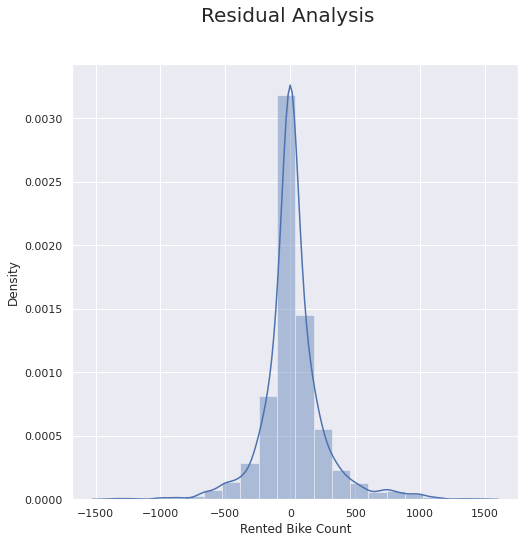

In [89]:
# Residuals Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)**2 - (y_pred_rf_test)**2),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

# Implementing XGBoost Regressor

In [90]:
from xgboost import XGBRegressor
import xgboost as xgb

# Number of trees in random forest
n_estimators = [250,300,350]
# Maximum number of levels in tree
max_depth = [16,18,20]
# Minimum number of samples required to split a node
min_samples_split = [4,6,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4,6]
# Learning rate
learning_rate = [0.1, 0.05, 0.01, 0.005]
# Create the random grid
param_dict_xgbr = {'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'learning_rate': learning_rate}

In [91]:
xgbr = xgb.XGBRegressor()

# Grid search
xgbr_grid = GridSearchCV(estimator=xgbr, param_grid = param_dict_xgbr, cv = 5, verbose=2, scoring='r2')

xgbr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[06:24:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=250; total time=   4.1s
[06:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=250; total time=   4.0s
[06:24:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=250; total time=   3.9s
[06:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=16, min_samples_leaf=4, min_sa

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005],
                         'max_depth': [16, 18, 20], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [250, 300, 350]},
             scoring='r2', verbose=2)

In [92]:
print('The best parameters for Xgboost Regression are ' , xgbr_grid.best_params_)
print('The R2 score using the same alpha is :', xgbr_grid.best_score_)


The best parameters for Xgboost Regression are  {'learning_rate': 0.05, 'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 350}
The R2 score using the same alpha is : 0.8871094161912054


The best parameters for Xgboost Regression are 

{'learning_rate': 0.05, 'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 350}

In [93]:
# predicted value of train and test dataset
y_pred_xgbr_train=xgbr_grid.predict(X_train)
y_pred_xgbr_test=xgbr_grid.predict(X_test)

# XGBoost Regressor Model Evaluation

In [157]:
# Train Data Evaluation Metrics 
xgbr_train_mse  = mean_squared_error(y_train**2, y_pred_xgbr_train**2)
print("Train MSE :" , xgbr_train_mse)

xgbr_train_r2 = r2_score(y_train, y_pred_rf_train)
print("Train R2 :" ,xgbr_train_r2)

xgbr_train_adjusted_r2= 1-(1-r2_score(y_train, y_pred_rf_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", xgbr_train_adjusted_r2)

Train MSE : 2.64189272435747
Train R2 : 0.9532551223534894
Train Adjusted R2 :  0.953150703416081


In [132]:
# Test Data Evaluation Metrics 
xgbr_test_mse  = mean_squared_error(y_test, y_pred_xgbr_test)
print("Test MSE :" , xgbr_test_mse)

xgbr_test_r2 = r2_score(y_test, y_pred_xgbr_test)
print("Test R2 :" ,xgbr_test_r2)

xgbr_test_adjusted_r2= 1-(1-r2_score((y_test), (y_pred_xgbr_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", xgbr_test_adjusted_r2)

Test MSE : 16.277046359443275
Test R2 : 0.8946367091154187
Test Adjusted R2 :  0.8940857899473947


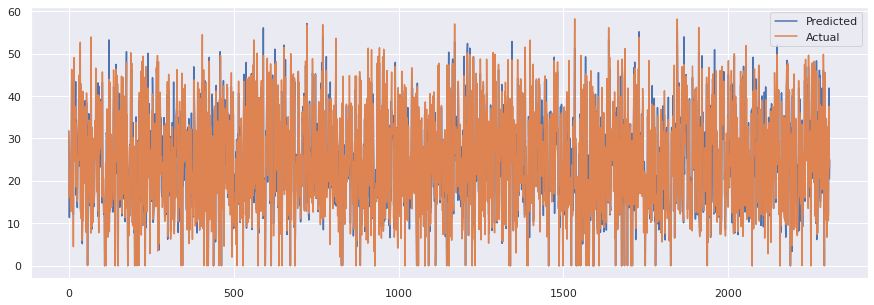

In [102]:
# prediction vs actual for Xgboost regressor
plt.figure(figsize=(15,5))
plt.plot((np.array(y_pred_xgbr_test)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

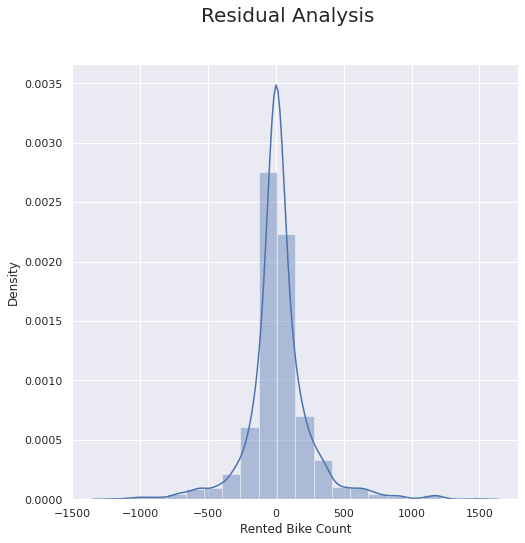

In [103]:
# Residuals Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)**2 - (y_pred_xgbr_test)**2),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

In [104]:
Features = bike_data.drop(labels='Rented Bike Count',axis=1)
importance_df= pd.DataFrame({'Features': list(Features.columns) , 'Feature_importance': list(xgbr_grid.best_estimator_.feature_importances_)})
importance_df.sort_values(by=['Feature_importance'],ascending=False,inplace=True)
importance_df.reset_index(drop = True)

,Features,Feature_importance
0,Functioning Day,0.872783
1,Seasons,0.054224
2,Rainfall(mm),0.022175
3,Hour,0.015209
4,Temperature(°C),0.010959
5,Solar Radiation (MJ/m2),0.007807
6,Month,0.006326
7,Holiday,0.004566
8,Humidity(%),0.003432
9,Snowfall (cm),0.001201


Let's visualise the important features

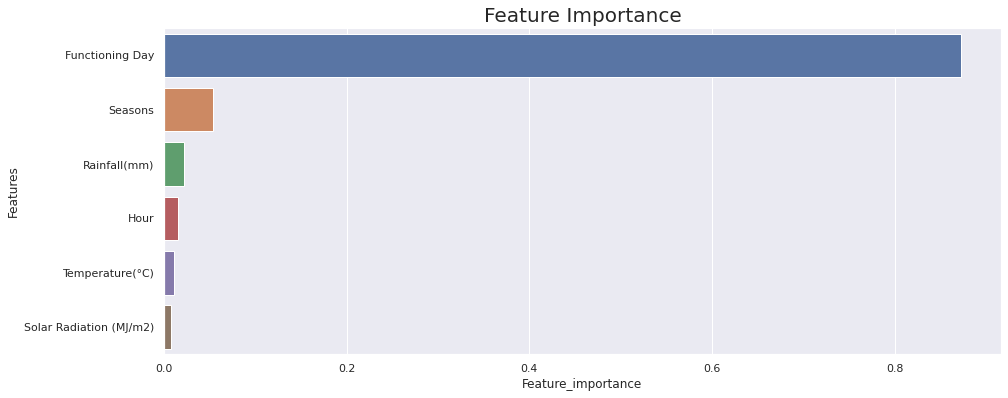

In [105]:
plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x="Feature_importance",y='Features', data=importance_df[:6], orient = 'h')
plt.show()

Clearly, we can see functioning day is the top contributor to bike rental count followed by different seasons of the year.

# Evaluating the different models

Models Summary for the Train data

In [158]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','Ramdom Forest' 'XGBoost Regressor']
train_mse= [lr_train_mse, lasso_train_mse, ridge_train_mse, dt_train_mse, rf_train_mse, xgbr_train_mse]
train_r2= [lr_train_r2, lasso_train_r2, ridge_train_r2, dt_train_r2, rf_train_r2, xgbr_train_r2]
train_adjusted_r2= [lr_train_adjusted_r2, lasso_train_adjusted_r2, ridge_train_adjusted_r2, dt_train_adjusted_r2, rf_train_adjusted_r2, xgbr_train_adjusted_r2]

Models Summary for the test data

In [159]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','Random Forest', 'XGBoost Regressor']
test_mse= [lr_test_mse, lasso_test_mse, ridge_test_mse, dt_test_mse, rf_test_mse, xgbr_test_mse]
test_r2= [lr_test_r2, lasso_test_r2, ridge_test_r2, dt_test_r2, rf_test_r2, xgbr_test_r2]
test_adjusted_r2= [lr_test_adjusted_r2, lasso_test_adjusted_r2, ridge_test_adjusted_r2, dt_test_adjusted_r2, rf_test_adjusted_r2, xgbr_test_adjusted_r2]

# Model Comparison & Selection

In [160]:
model_comparison = pd.DataFrame({'Model Name': models,
                          'Train MSE': train_mse,'Test MSE': test_mse,
                          'Train R^2': train_r2, 'Test R^2': test_r2,
                          'Train Adjusted R^2': train_adjusted_r2, 'Test Adjusted R^2': test_adjusted_r2})
model_comparison

,Model Name,Train MSE,Test MSE,Train R^2,Test R^2,Train Adjusted R^2,Test Adjusted R^2
0,Linear Regression,176191.029574,52.405392,0.583305,0.576363,0.582375,0.574147
1,Lasso Regression,176488.594182,928867.969186,0.582602,0.575789,0.581669,0.573571
2,Ridge Regression,176363.451769,184484.894829,0.582898,0.576023,0.581966,0.573806
3,DecisionTree Regressor,52168.403781,76743.022480,0.876621,0.823632,0.876345,0.822710
4,Random Forest,24142.557298,58033.498941,0.942902,0.866629,0.942775,0.865932
5,XGBoost Regressor,2.641893,16.277046,0.953255,0.894637,0.953151,0.894086


# Conclusion



*   People prefers to borrow a bike during non- holidays and functional days of the week.
*   There is no significant difference in bike rented on various days of the weeks, but minimum bike rented on Sunday.

*   People prefer borrowing bikes more in a particular season. Rented bike count is highest in summer and least in winter. Peak demand of bike is at 8am and 6pm i.e. during office opening and closing times
*   From the above graph, it can be concluded that the bike count is less in December, January, February (i.e. in winter) and maximum in June followed by July and May.

*  Temperture, dew point temperture and humidity are highly correlated with each other
*  MSE and R2 and Adjusted R2 which are the metrics used to evaluate the performance of regression model of Linear Regression, Lasso, Ridge, Decision Tree, Random Forest and XGBoost Regressor.

*   The Linear models don't show good performance on our training and testing environment.
*   Lasso and Ridge Regression helps to reduce model complexity and prevent over-fitting which may result from simple linear regression. R square value of 0.575789, 0.576023 is obtained through Lasso and ridge regression respectively.

*   R square value of 0.823632, 0.866629 is obtained through Decision tree and random forest regression respectively which is quite effective.
*   On comparing various regression models, it can be concluded XGBoost Regressor (89.46%) is the best models to predict the bike count required at each hour for the stable supply of rental bikes.








